# Data Structures Course 
Shiraz University Fall 2024    
Reza Rezazadegan   
[www.dreamintelligent.com](www.dreamintelligent.com) 

# 8- Graphs and Breath First Search

From the point of view of _computer science_, a graph is similar to a tree (i.e. is a generalized linked list) with the difference that in a graph, a node can have multiple incoming links,or in other words, multiple parents.

From the point of view of _mathematics_, a graph is a tuple $$G=(V,E)$$ where the elements of $V$ are called the **nodes** or **vertices** of the graph and $E\subset V\times V$ contains tuples of the form $(u,v)$ where $u,v$ are nodes.
The elements of $E$ are called the **edges** or the **links** of the graph.

A graph encodes a system of elemements $V$ and their relations are encoded in $E$. 

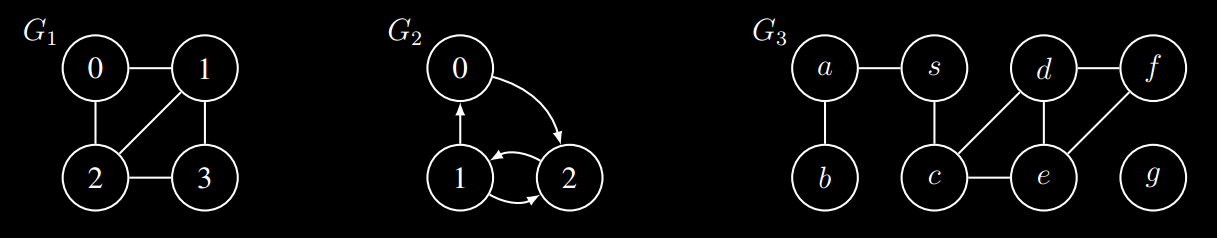

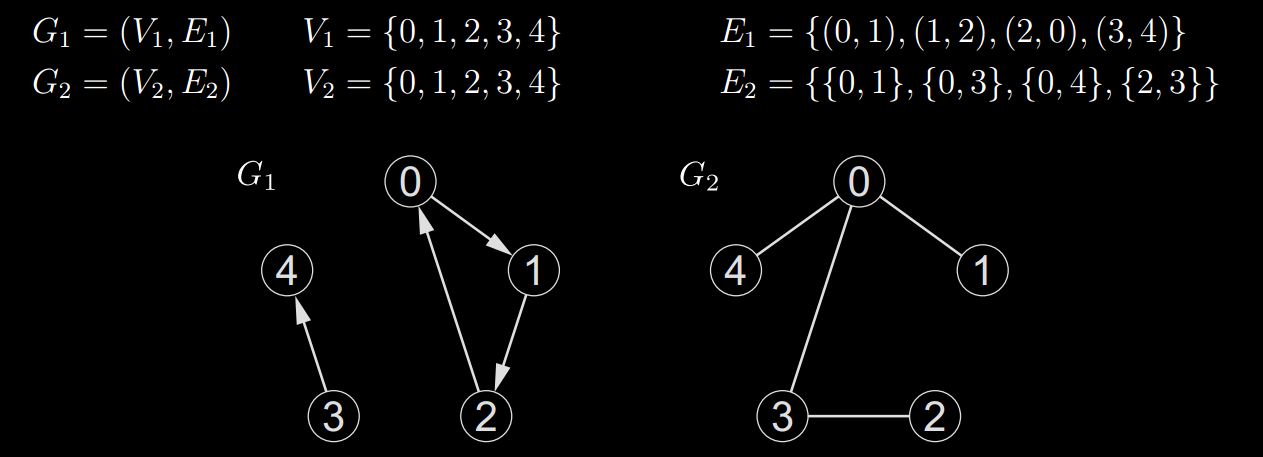

Note: a graph can be **directed** or **undirected**, depending on whether $E$ is symmetric or not. A rooted tree is always directed (from the parent to child).  

Note: we do not allow two edges between the same pair of nodes, or an edge from a node to itself. (**Simple graph**)
This implies that $|E|\leq \binom{|V|}{2}\in O(|V|^2)$ for undirected graphs.


A **path** from a node $u$ to a nde $v$ is a sequence $u_0, u_1, \ldots, u_k$ such that $u_0=u, u_k=v$ and $(u_i, u_{i+1})\in E$. The **length** of this path is $k$, i.e. the number of edges in the path.  

One thing that can exist in a graph but not in a tree is a **cycle**, i.e. a nontrivial path from a node to itself.  

A "large" and "sparse" graph is called a **network**. Neworks appear in many contexts such as:
- Transportation netorks  
- Communication networks 
- Social networks (both online and offline)  
- Citation networks

Network theory is a science in itself and you can read about it [here](https://dreamintelligent.com/complex-network-analysis-course/). 

The **degree** of a node is the number of edges connected to it. In a directed graph we have **in-degree** and **out-degree**. 

There are various problems studied in graph and network theory such as:
- Connectedness
- Finding shortest paths and distances
- Node importance and centrality
- Community detection
- Graph representation 
- Graph generation


In this course we mostly focus on the first two problems. 



- The outgoing neighbor set of u ∈ V is $Adj^+(u) = \{v ∈ V | (u, v) ∈ E\}$
- The incoming neighbor set of u ∈ V is $Adj^-(u) = \{v ∈ V | (v, u) ∈ E\}$
- The out-degree of a vertex u ∈ V is $deg^+(u) = |Adj^+(u)|$
- The in-degree of a vertex u ∈ V is $deg^−(u) = |Adj^−(u)|$
- For undirected graphs, $Adj^−(u) = Adj^+(u)$ and $deg^−(u) = deg^+(u)$
- Dropping superscript defaults to outgoing, i.e., $Adj(u) = Adj^+(u)$ and $deg(u) = deg^+(u)$



# Representing graphs in computers
Examples 1 and 2 assume vertices are labeled {0, 1, . . . , |V | − 1}, so can use a direct access 
array for Adj, and store Adj(u) in an array. Example 3 uses a hash table for Adj.
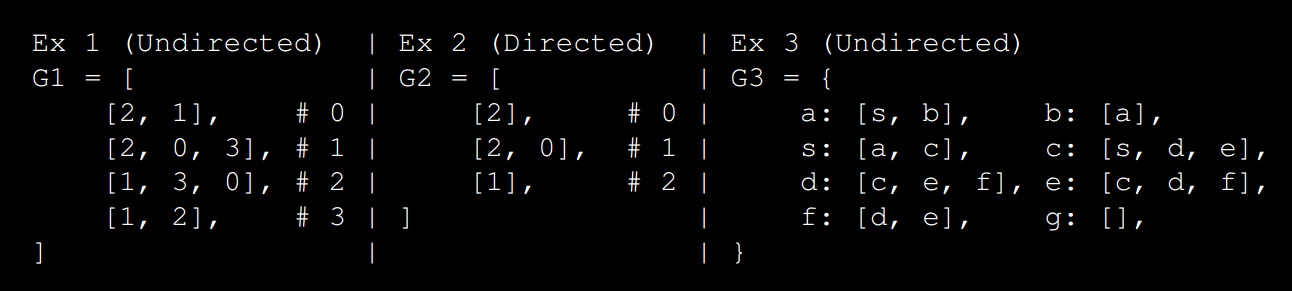


- To store a graph G = (V, E), we store the immediate neighbors Adj(u) for all u ∈ V
- First, need a Set data structure `Adj` to map `u` to `Adj(u)`: Common to use direct access array or hash table   
- Then for each `u`, need to store `Adj(u)`: Common to use array or linked list for each Adj(u) since usually only iteration is needed  


- For the common representations, `Adj` has size Θ(|V |), while each `Adj(u)` has size Θ(deg(u))   
- Since for each u∈V, $deg(u) ≤ 2|E|$, graph storable in Θ(|V | + |E|) space   
- Thus, for algorithms on graphs, linear time will mean Θ(|V | + |E|) (linear in size of graph in memory)    

# Adjacency matrix
After enumerating the vertices $$v_1, v_2, \ldots, v_n$$
$A_{i,j}=1 $ if and only if $(v_j, v_i)\in E$, and it's zero otherwise.

The adjacency matrix of an undirected graph is symmetric. 


We can encode the edge weights in the adjacency matrix of the graph. 

**Lemma:** $(A^m)_{i,j}$ equals the number of paths of length $m$ from $v_j$ to $v_i$.

**Consequence:** If $B=\sum_{m=0}^\infty A^m$ exists, then $b_{i,j}$ is the number of all the paths from $v_j$ to $v_i$ in the graph. 

**Proposition:** if all the eigenvalues of $A$ are less than 1 and $I-A$ is invertible then $B=(I-A)^{-1}$. 

However the adjacency matrix can be quite large for a large graph and it is not efficient to work with. 



A **weighted graph** is one in which each edge has a weight which is a non-negative real number. The weight encodes the strength of the connection between the two nodes. For example in a transportation network the weight can represent the traffic in the route corresponding to an edge.



# Path-related problems in graphs
Let $s,t$ be two nodes in $G$. 

- `SINGLE_PAIR_REACHABILITY(G, s, t)`: is there a path from $s$ to $t$? 
-  `SINGLE_PAIR_SHORTEST_PATH(G, s, t)`: return distance δ(s,t), and a shortest path from $s$ to $t$. 
- `SINGLE_SOURCE_SHORTEST_PATHS(G, s)`: return δ(s, v) for all v ∈ V , and a shortest-path tree containing a shortest path from s to every v ∈ V.

Note that the third problem includes the second one, and the second problem includes the first problem. 

How to return a shortest path from source vertex s for every vertex in graph? 
Many paths could have length Ω(|V |), so returning every path could require $Ω(|V |^2)$ time. 
Instead, for all v ∈ V , store its parent P(v): second to last vertex on a shortest path from s.


In [ ]:
def bfs(Adj, s):                            # Adj: adjacency list, s: starting vertex
    parent = [None for v in Adj]            # O(V) (use hash if unlabeled)
    parent[s] = s                            # O(1) root
    level = [[s]]                            # O(1) initialize levels
    while 0 < len(level[-1]):                 # O(?) last level contains vertices
        level.append([])                     # O(1) amortized, make new level
        for u in level[-2]:                  # O(?) loop over last full level
            for v in Adj[u]:                 # O(Adj[u]) loop over neighbors
                if parent[v] is None:        # O(1) parent not yet assigned
                    parent[v] = u             # O(1) assign parent from level[-2]
                    level[-1].append(v)       # O(1) amortized, add to border
    return parent